# Gaussian Elimination with Floating Point Arithmetic & LU Decomposition



---
This notebook highlight how to solve a linear system using the method **linalg.solve**() from the numpy package. In addition, the implementation of **Gaussian elimination**, **Backward substitution** and **Farward substitution** is provided and tested. Then, different example related to the application of Gaussian elimination and Backward substitution to a linear system, in Floating Point Arithmetic. In the second part, we will apply the **LU decomposition** to solve a linear system. Lastly, we will compare the computational cost of Gaussian elimination respect to the LU decomposition.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import linalg

## Solve a linear system using np.linalg.solve

### Create the matrix of coefficients **A** and the vector of coefficients **b** of size 3x3

In [2]:
A = np.random.rand(3,3)
b = np.array([1,2,3])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =', b)

Matrix of coefficients A =
 [[0.50787291 0.36159428 0.97854491]
 [0.93726861 0.14956233 0.29502703]
 [0.81074215 0.70009794 0.26489215]]

Vector of known terms b = [1 2 3]


### Solve the linear system using *np.linalg.solve*()

In [3]:
x = np.linalg.solve(A,b)
print('The linear system solutions are: ', x)
print('The object type of the solutions vector is: ', type(x))

The linear system solutions are:  [ 2.0502375   2.23999169 -0.86989187]
The object type of the solutions vector is:  <class 'numpy.ndarray'>


### Check for the residuals (errors) between the exact solution and the computed one

In [4]:
print('The residual computed by A*x-b =', np.dot(A,x)-b)

The residual computed by A*x-b = [-2.22044605e-16  0.00000000e+00  0.00000000e+00]


## Gaussian Elimination, Backward Substitution and Forward Substitution implementation

### Gaussian Elimination
Implementation of Gaussian Elimination to use with square matrix.
* INPUT
  * **A**: Coefficient matrix A
  * **b**: Known terms vector
* OUTPUT
  * **U[:,0:n]**: The Upper Triangular matrix related to the input matrix A,
  * **U[:,n]**: The updated vector of known term

In [5]:
def gaussian_elimination(A, b):
  # Create the augumented matrix [A|b]
  U = np.hstack((A,b))

  # Retrive the number of rows and columns
  (m,n) = np.shape(U)

  for j in range(0,n):
    for i in range(j+1, m):

      # Compute M = U[i,j] / U[j,j]
      M = U[i,j] / U[j,j]

      # Put zero on all the element below the pivotal element
      U[i,j] = 0

      # Compute the row elimination
      for k in range(j+1, n):
        U[i,k] = U[i,k] - M * U[j,k]

  return U[:,0:n-1], U[:,n-1]

### Forward Substitution
Implementation of Forward Substitution used to solve a Lower Triangular System (implementation by row).
* INPUT
  * **A**: Coefficient matrix
  * **b**: Known terms vector
* OUTPUT
  * **solved**: Boolean values used to indicate if the system could be solved or not
  * **x**: A vector of solutions for the given system (if **solved** is True), or a sentence to indicate that the system could not be solved



In [6]:
def forward_substitution(A,b):
  solved = True

  # Check if the matrix is not singular
  # The product of the main diagonal MUST be =/= 0
  if(abs(np.prod(np.diag(A)))< 1.0e-18):
    x = 'Linear system without solution!'
    solved = False
  else:
    # Retrive the number of rows
    m = b.shape[0]

    # Create a vector to store the solutions
    x = np.zeros((m,1))

    # Compute the first solution of Lower Tr. System
    x[0]=b[0]/A[0,0]

    # Compute each solutions Xi and store it
    # np.dot compute the product row by columns up to the i-th row
    for i in range(1,m):
        x[i]=(b[i] - np.dot(A[i,0:i],x[0:i]))/A[i,i]
  return solved, x

### Backward Substitution
Implementation of Backward Substitution used to solve an Upper Triangular System (implementation by row).
* INPUT
  * **A**: Coefficient matrix
  * **b**: Known terms vector
* OUTPUT
  * **solved**: Boolean values used to indicate if the system could be solved or not
  * **x**: A vector of solutions for the given system (if **solved** is True), or a sentence to indicate that the system could not be solved

In [7]:
def backward_substitution(A,b):
  solved = True

  # Check if the matrix is not singular
  # The product of the main diagonal MUST be =/= 0
  if(abs(np.prod(np.diag(A)))< 1.0e-18):
    x = 'Linear system without solution!'
    solved = False
  else:
    # Retrive the number of rows
    m = b.shape[0]

    # Create a vector to store the solutions
    x = np.zeros((m,1))

    # Compute the first solution of Lower Tr. System
    x[m-1]=b[m-1]/A[m-1,m-1]

    # Compute each solutions Xi and store it
    # np.dot compute the product row by columns up to the i-th row
    for i in range(m-2, -1, -1):
        x[i]=(b[i] - np.dot(A[i,i:m],x[i:m]))/A[i,i]
  return solved, x

### Test of Forward substitution
To test our implementation we will create a Lower triangular system **L** with the exact solutions **xt** (x_true); then we will compute the vector of know terms **b** (b = Lxt). At this point, we will apply the **Forward substitution** on **L** and **b**, to find **x**. Lastly, we compare the xt and x, and we compute the absolute error.

In [8]:
# Define the size of linear system
n = 6

# Create the Lower traingual matrix of size n
L  = np.tril(np.random.rand(n,n))
print('Matrix of coefficients L =\n', L)

# Fix the exact solutions of the linear system to one
xt = np.ones((n,1))

# Compute the vector of known terms
b  = np.dot(L,xt)
print('\nVector of known terms b =\n', b)

# Computed the solutions using the Forward substitution
(solved, x)  = forward_substitution(L, b)

print('\n----------------------------------------')
if solved:
  print('\nThe exact solutions are xt =\n', xt)
  print('\nThe computed solutions are x =\n', x)
  print('\nThe absolute error with respect each solution is =\n', abs(x-xt))
else:
  print(x)

Matrix of coefficients L =
 [[0.19610426 0.         0.         0.         0.         0.        ]
 [0.53741065 0.42377039 0.         0.         0.         0.        ]
 [0.99090624 0.14696455 0.39163955 0.         0.         0.        ]
 [0.7481865  0.43222881 0.25010105 0.19640996 0.         0.        ]
 [0.19758784 0.09485864 0.39247296 0.21150504 0.23386653 0.        ]
 [0.47965415 0.54840408 0.79701868 0.51401446 0.63258044 0.97231535]]

Vector of known terms b =
 [[0.19610426]
 [0.96118104]
 [1.52951034]
 [1.62692632]
 [1.13029101]
 [3.94398716]]

----------------------------------------

The exact solutions are xt =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

The computed solutions are x =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

The absolute error with respect each solution is =
 [[0.00000000e+00]
 [0.00000000e+00]
 [2.22044605e-16]
 [5.55111512e-16]
 [4.44089210e-16]
 [2.22044605e-16]]


### Test of Gaussian elimination and Backward substitution

In [9]:
# Define the size of linear system
n = 6

# Create a coeffiecient matrix of size n
A  = np.random.rand(n,n)
print('Matrix of coefficients A =\n', A)

# Fix the exact solutions of the linear system to one
xt = np.ones((n,1))

# Compute the vector of known terms
b  = np.dot(A, xt)
print('\nVector of known terms b =\n', b)

# Compute the Gaussian elimination
(U, b_u) = gaussian_elimination(A, b)
print('\nUpper Triangular matrix of coefficients U =\n', U)
print('\nVector of updated known terms b =\n', b_u)

# Computed the solutions using the Backward substitution
(solved, x)  = backward_substitution(U, b_u)

print('\n----------------------------------------')
if solved:
  print('\nThe exact solutions are xt =\n', xt)
  print('\nThe computed solutions are x =\n', x)
  print('\nThe absolute error with respect each solution is =\n', abs(x-xt))
else:
  print(x)

Matrix of coefficients A =
 [[0.52644579 0.90954012 0.60348826 0.7675585  0.27438745 0.87445058]
 [0.42742209 0.13341314 0.38895647 0.48524177 0.45498351 0.98256385]
 [0.6391013  0.84595756 0.96832829 0.28569287 0.95250973 0.19529873]
 [0.93669269 0.81905811 0.49538855 0.26220352 0.15819692 0.39152874]
 [0.22594977 0.67555112 0.4071059  0.54043011 0.71923109 0.68968543]
 [0.37478507 0.42158887 0.01182674 0.00123471 0.552029   0.39055416]]

Vector of known terms b =
 [[3.9558707 ]
 [2.87258085]
 [3.88688848]
 [3.06306853]
 [3.25795342]
 [1.75201855]]

Upper Triangular matrix of coefficients U =
 [[ 0.52644579  0.90954012  0.60348826  0.7675585   0.27438745  0.87445058]
 [ 0.         -0.60504379 -0.10101651 -0.13794008  0.23220795  0.27259617]
 [ 0.          0.          0.2788093  -0.58724814  0.52030489 -0.98261499]
 [ 0.          0.          0.         -1.85844212  0.19357213 -3.09257793]
 [ 0.          0.          0.          0.          0.56065304  0.20188022]
 [ 0.          0.      

## Test of Gaussian elimination and Backward substitution with floating point arithmetic

In [10]:
par = 1e-17 # 10^(-17)

### Test n. 1



In [11]:
A = np.array( [[par,1.],[1., 2.]])
b = np.array([[1.],[3.]])

In [12]:
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)

Matrix of coefficients A =
 [[1.e-17 1.e+00]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.]
 [3.]]


In [13]:
(U,b_u) = gaussian_elimination(A,b)
print('Upper Triangular matrix of coefficients U =\n', U)
print('\nVector of updated known terms b =\n', b_u)

Upper Triangular matrix of coefficients U =
 [[ 1.e-17  1.e+00]
 [ 0.e+00 -1.e+17]]

Vector of updated known terms b =
 [ 1.e+00 -1.e+17]


In [14]:
(solved, xg) = backward_substitution(U, b_u)

if solved:
  print('Solution after Gaussian Elimination and Backward substitution:\n', xg)
  print('\nSolution using np.linalg.solve(A,b):\n', np.linalg.solve(A, b))
else:
  print(xg)

Solution after Gaussian Elimination and Backward substitution:
 [[0.]
 [1.]]

Solution using np.linalg.solve(A,b):
 [[1.]
 [1.]]


### Test n. 2

In [15]:
A = np.array( [[10.,1./par],[1., 2.]])
b = np.array([[1./par],[3.]])

In [16]:
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)

Matrix of coefficients A =
 [[1.e+01 1.e+17]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.e+17]
 [3.e+00]]


In [17]:
(U,b_u) = gaussian_elimination(A,b)
print('Upper Triangular matrix of coefficients U =\n', U)
print('\nVector of updated known terms b =\n', b_u)

Upper Triangular matrix of coefficients U =
 [[ 1.e+01  1.e+17]
 [ 0.e+00 -1.e+16]]

Vector of updated known terms b =
 [ 1.e+17 -1.e+16]


In [18]:
(solved, xg) = backward_substitution(U, b_u)

if solved:
  print('Solution after Gaussian Elimination and Backward substitution:\n', xg)
  print('\nSolution using np.linalg.solve(A,b):\n', np.linalg.solve(A, b))
else:
  print(xg)

Solution after Gaussian Elimination and Backward substitution:
 [[1.6]
 [1. ]]

Solution using np.linalg.solve(A,b):
 [[1.6]
 [1. ]]


## LU decomposition
Firstly, we apply the LU decomposition and the we will see how to solve a linear system.

In [19]:
# define a matrix that we want to factorize using the LU decomposition
A = np.random.rand(5,5)
print("Matrix A: \n{}".format(A))

P, L, U = linalg.lu(A)
print("\nThe permutation matrix P: \n{}".format(P))
print("\nThe lower triangular matrix with unit diagonal elements L: \n{}".format(L))
print("\nThe upper triangular matrix U: \n{}".format(U))

Matrix A: 
[[0.54927462 0.36820146 0.20910603 0.34771986 0.50973572]
 [0.42821379 0.94700364 0.55995696 0.8769335  0.63964454]
 [0.78429611 0.17590431 0.19880101 0.2967113  0.06004943]
 [0.02756887 0.75868812 0.28929722 0.76263932 0.93603086]
 [0.39385608 0.25903538 0.28038782 0.75189474 0.50681723]]

The permutation matrix P: 
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]

The lower triangular matrix with unit diagonal elements L: 
[[ 1.          0.          0.          0.          0.        ]
 [ 0.54598484  1.          0.          0.          0.        ]
 [ 0.0351511   0.88429848  1.          0.          0.        ]
 [ 0.50217778  0.20059654 -0.77006457  1.          0.        ]
 [ 0.70034088  0.28791923  0.5141632  -0.23124314  1.        ]]

The upper triangular matrix U: 
[[ 0.78429611  0.17590431  0.19880101  0.2967113   0.06004943]
 [ 0.          0.85096255  0.45141462  0.71493363  0.60685846]
 [ 0.          0.         -0.11687611  0.11

In [20]:
# define a linear system that we want to solve using LU decomposition
A = np.random.rand(5,5)
b = np.random.rand(5,1)
print("Matrix A: \n{}".format(A))
print("\nKnow terms b: \n{}".format(b))

LU, piv = linalg.lu_factor(A)
print("\nThe LU decomposed matrix: \n{}".format(LU))
print("\nThe pivot indices representing the permutation matrix P: \n{}".format(piv))

x = linalg.lu_solve((LU, piv), b)
print("\nThe solution x; \n{}".format(x))

Matrix A: 
[[0.44487869 0.24238269 0.71500761 0.12098959 0.75283992]
 [0.18526812 0.81114973 0.26454311 0.66740174 0.68307149]
 [0.27569018 0.12998349 0.2992356  0.589558   0.93041526]
 [0.58232945 0.04940877 0.20355857 0.83442699 0.21372892]
 [0.63460283 0.00309194 0.51478902 0.512805   0.97282019]]

Know terms b: 
[[0.50785277]
 [0.60311171]
 [0.53354581]
 [0.65914434]
 [0.3463754 ]]

The LU decomposed matrix: 
[[ 0.63460283  0.00309194  0.51478902  0.512805    0.97282019]
 [ 0.29194342  0.81024706  0.11425384  0.5176917   0.39906303]
 [ 0.70103484  0.29647146  0.32024957 -0.39198539 -0.04745172]
 [ 0.43442948  0.15876671  0.17941124  0.35491477  0.45294894]
 [ 0.91762819  0.05747817 -0.85993383 -0.00838173 -0.73890456]]

The pivot indices representing the permutation matrix P: 
[4 1 4 4 4]

The solution x; 
[[-1.54255996]
 [-0.37076584]
 [ 2.13082757]
 [ 1.51236546]
 [-0.56129643]]


## Comparing *Gaussian elimination and back substitution* with *LU decomposition* to solve linear system
The aim of this test is to show the different time required to solve a linear system by using the two methods. In particular, remember that:


*   Gaussian elimination 	$\sim O(n^3)$
*   LU decomposition $\sim O(n^2)$



In [21]:
# Test computational time for Gaussian elimination
dim_matrix = [5, 10, 100, 250, 500, 750, 900, 1000, 1500, 1700, 1800, 2000]
comp_time_gaussian = np.empty([1, len(dim_matrix)])

for i in range(len(dim_matrix)):
  n = dim_matrix[i]
  A = np.random.rand(n,n)
  b = np.random.rand(n,1)

  print("Solving linear system of size {} using Gaussian elimination ...".format(dim_matrix[i]))
  t0 = time.process_time()
  (U, b_u) = gaussian_elimination(A, b)
  backward_substitution(U, b_u)
  comp_time_gaussian[0, i] = time.process_time() - t0
  print("--------------------------------------------------------------------")

Solving linear system of size 5 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 10 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 100 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 250 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 500 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 750 using Gaussian elimination ...


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


--------------------------------------------------------------------
Solving linear system of size 900 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1000 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1500 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1700 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1800 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 2000 using Gaussian elimination ...
--------------------------------------------------------------------


In [22]:
# Test computational time for LU decomposition
dim_matrix = dim_matrix + [2500, 3000, 5000, 7500, 10000]
comp_time_lu = np.empty([1, len(dim_matrix)])

for i in range(len(dim_matrix)):
  n = dim_matrix[i]
  A = np.random.rand(n,n)
  b = np.random.rand(n,1)

  print("Solving linear system of size {} using LU decomposition ...".format(dim_matrix[i]))
  t0 = time.process_time()
  lu, piv = linalg.lu_factor(A)
  linalg.lu_solve((lu, piv), b)
  comp_time_lu[0, i] = time.process_time() - t0
  print("--------------------------------------------------------------------")

Solving linear system of size 5 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 10 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 100 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 250 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 500 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 750 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 900 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 1000 using LU decomposition ...
-------------------------------

Text(0.5, 1.0, 'Comparing computational time: Gaussian elimination, LU decomposition')

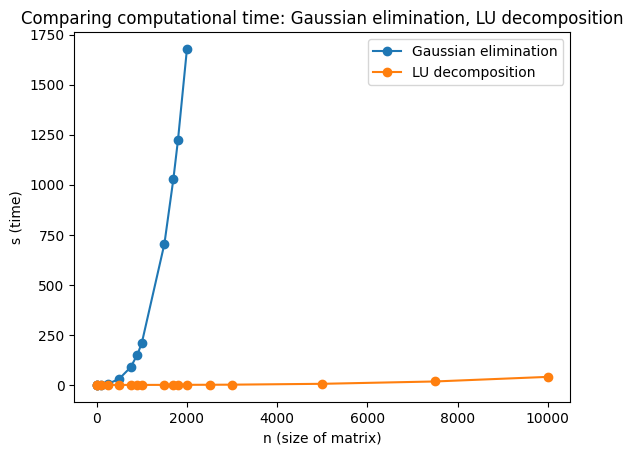

In [23]:
plt.plot(dim_matrix[0:12], comp_time_gaussian[0],'o-')
plt.plot(dim_matrix, comp_time_lu[0], 'o-')
plt.legend(["Gaussian elimination", "LU decomposition"])
plt.xlabel("n (size of matrix)")
plt.ylabel("s (time)")
plt.title("Comparing computational time: Gaussian elimination, LU decomposition")